# L2正則化核函數羅吉斯回歸(Kernel Logistic Regression with L2 Regularization)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

##### 設定我們有60個點，其中30個是圈圈，30個是叉叉

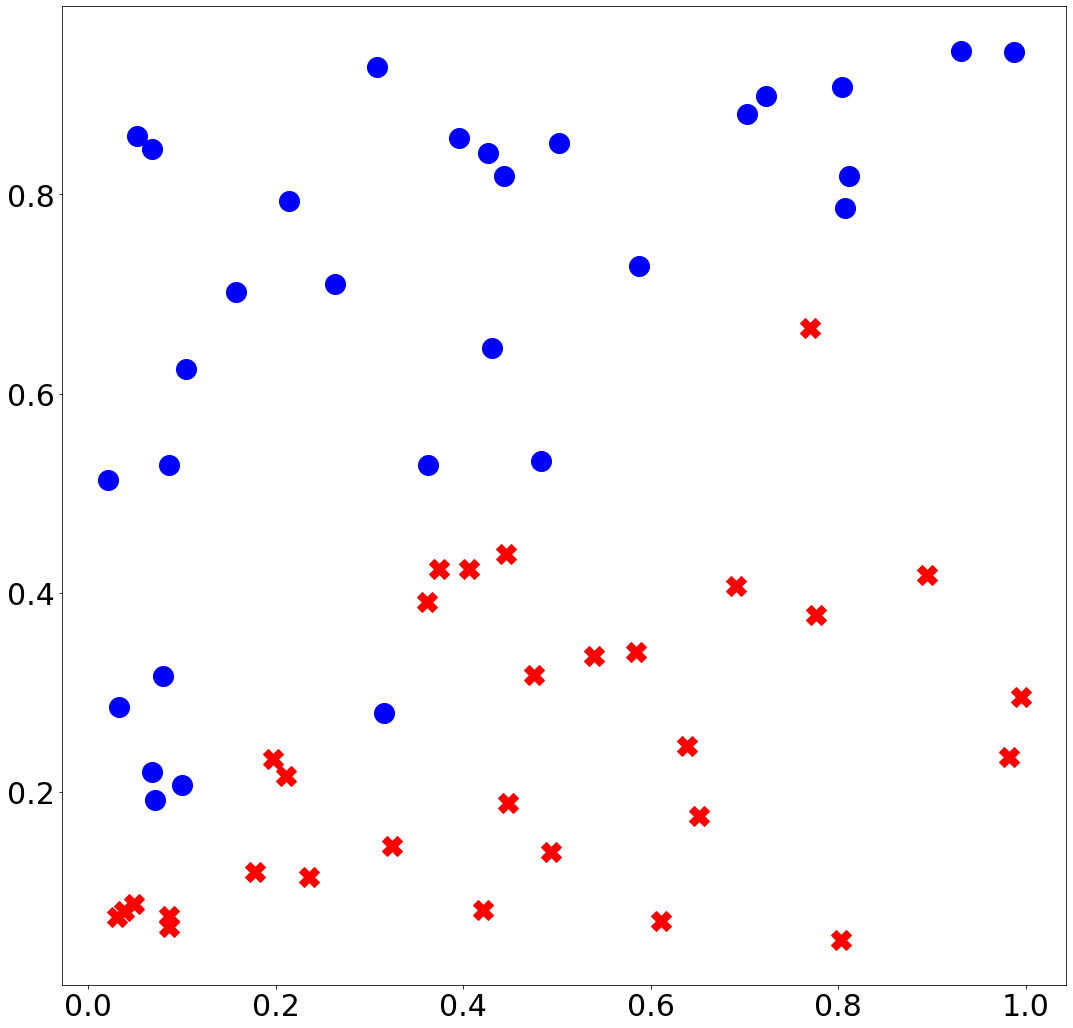

In [2]:
# 這裡我們建立一個60*2的矩陣x
# 60代表我們有60個點，2代表為2維空間(平面)
x=np.zeros((60,2))
# 這裡我們建立一個長度60的向量y
# 用來儲存我們的標記資料是圈圈(+1)還是叉叉(-1)
y=np.zeros(60)
# 因為有60筆資料，所以跑60個迴圈
for i in range(0,60): 
    # 標記y前半段0~29為圈圈(+1)，後半段30~59為叉叉(-1)
    # 也就是圈圈30個點，叉叉30個點
    f=-0.05
    if(i<30):
        y[i]=1
        x[i,0]=random.random()
        x[i,1]=random.uniform(x[i,0],1)+f
    else:
        y[i]=0
        x[i,0]=random.random()
        x[i,1]=random.uniform(0,x[i,0])-f
    # 這裡我們隨機給定我們資料的位置
    # 而f可以決定我們圈圈和叉叉兩組數據分的越開或是越近
    
# 設定我們輸出圖片的大小
plt.rcParams["figure.figsize"] = (18,18)
#畫出圈圈的點，bo：b代表藍色、o代表圈圈、marksize為大小
plt.plot(x[:30,0],x[:30,1],"bo",markersize=20)
#畫出叉叉的點，rX：r代表紅色、X代表叉叉、marksize為大小
plt.plot(x[30:,0],x[30:,1],"rX",markersize=20)
# 設定x和y軸座標的字體大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#畫出來
plt.show()

# Sigmoid Function

In [3]:
def sigmoid(s):
    return(1/(1+np.exp(-s)))

# Polynomial Kernel

In [4]:
def Polynomial_kernel(x,xx,power,gamma,zeta):
    # 最後出來要為N*N的矩陣
    # 這裡可以對照文章公式
    return (zeta+gamma*np.dot(x,xx.T))**power

# L2 Regularized Logistic Regression with Polynomial Kernal

-1.3988403972056696e-05


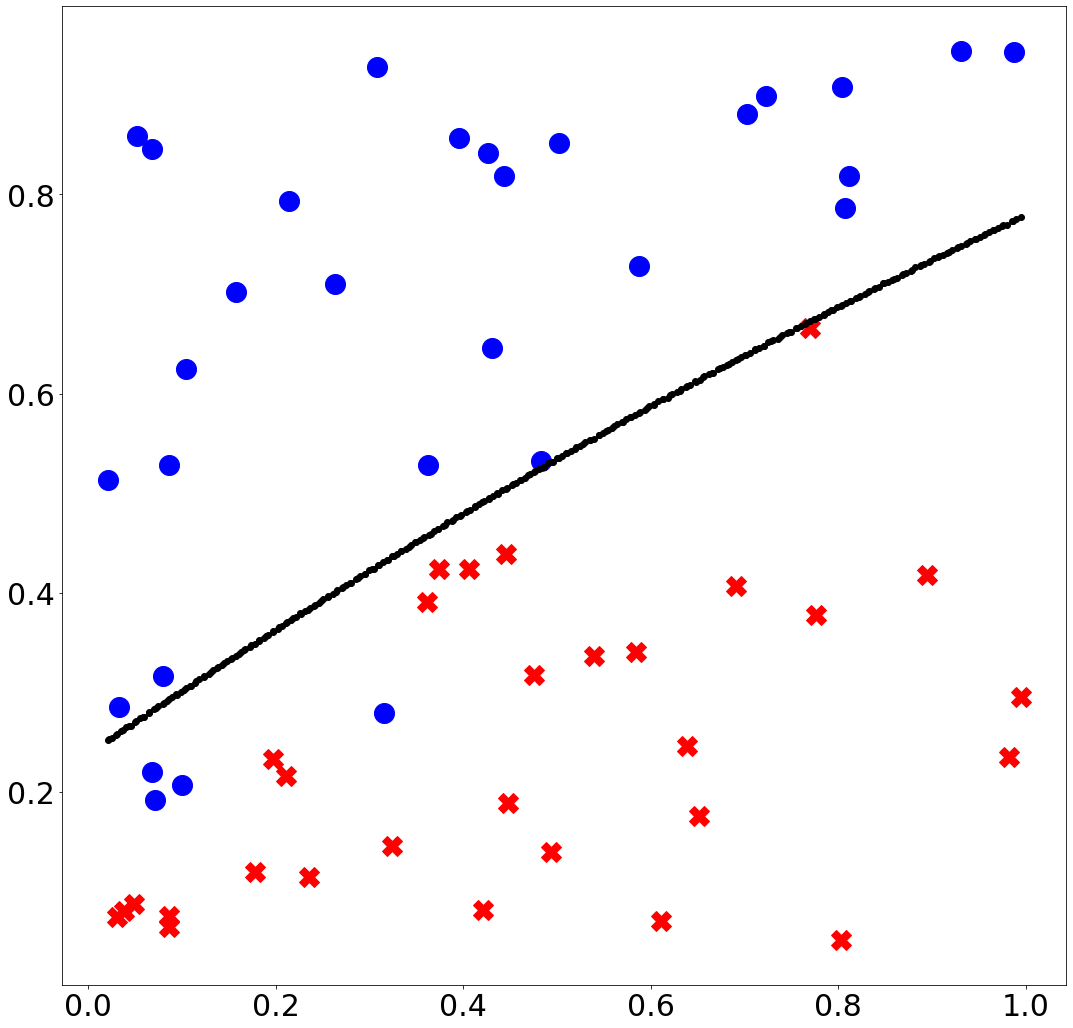

In [5]:
N=60
# c為次方數
c=5
gamma=1
zeta=1
lambda_2=1
# r: learning Rate
r=0.0002
a=np.ones(N)
K=Polynomial_kernel(x,x,c,gamma,zeta)
for i in range(0,900000):
    # 執行梯度下降演算法，可以對照文章中公式
    A=(2*lambda_2/N)*np.dot(K,a)
    B=np.dot(K/np.outer(np.ones(N)+np.exp(np.dot(K,a)),np.ones(N)).T,y-np.ones(N))/N
    C=np.dot(K/np.outer(np.ones(N)+np.exp(-np.dot(K,a)),np.ones(N)).T,y)/N
    a=a-r*(A+B+C)
# 輸出我們最後的梯度，確保a收斂
print(sum(A+B+C))
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)

# 畫出所有的數據點
plt.plot(x[:30,0],x[:30,1],"bo",markersize=20)
plt.plot(x[30:,0],x[30:,1],"rX",markersize=20)

#標記圖片邊界
x1_low_limit=min(x[:,0])
x1_high_limit=max(x[:,0])
x2_low_limit=min(x[:,1])
x2_high_limit=max(x[:,1])
# 畫出分割線
# 這裡的做法是
# 從x1最小值到x1最大值中間取200個點
# 從x2最小值到x2最大值中間取500個點
# 總共執行10000次，每次計算其套入分割線的方程式，並存入SUM
# 如果SUM從正變負或負變正，代表中間點為分割線

x1=np.linspace(x1_low_limit,x1_high_limit,200)
x2=np.linspace(x2_low_limit,x2_high_limit,500)

for i in x1:
    SUM_TEMP=0
    count=0
    for j in x2:
        SUM=np.dot(a,Polynomial_kernel(x,np.array([i,j]),c,gamma,zeta))
        if(np.sign(SUM)!=np.sign(SUM_TEMP)):
            if(count>0):
                plt.plot(i,(x2[count]+x2[count-1])/2,"ko")
        count+=1
        SUM_TEMP=SUM
x1=np.linspace(x1_low_limit,x1_high_limit,500)
x2=np.linspace(x2_low_limit,x2_high_limit,200)
for j in x2:
    SUM_TEMP=0
    count=0
    for i in x1:
        SUM=np.dot(a,Polynomial_kernel(x,np.array([i,j]),c,gamma,zeta))
        if(np.sign(SUM)!=np.sign(SUM_TEMP)):
            if(count>0):
                plt.plot((x1[count]+x1[count-1])/2,j,"ko")
        count+=1
        SUM_TEMP=SUM    

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.xlim([x1_low_limit,x1_high_limit])
#plt.ylim([x2_low_limit,x2_high_limit])
plt.show()
